<a href="https://colab.research.google.com/github/elenakelly/Deep-Learning-Emotion-Detection/blob/main/DeepLearningCNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
#with zipfile.ZipFile("data/archive.zip","r") as zip_ref:
#    zip_ref.extractall("data")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten, BatchNormalization
from keras.layers import Conv2D,MaxPooling2D, Activation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os

In [ ]:
#train_data = 'drive/MyDrive/DatAss3/archive/train'
#test_data = 'drive/MyDrive/DatAss3/archive/test'

train_data = "drive/MyDrive/archive/train/"
test_data = "drive/MyDrive/archive/test"

In [ ]:
train_data_generator = ImageDataGenerator(rescale=1./255, rotation_range=30,shear_range=0.3,zoom_range=0.3, horizontal_flip=True, fill_mode='nearest')
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_data_generator.flow_from_directory(train_data, color_mode='grayscale',target_size=(48,48),batch_size=32,class_mode='categorical',shuffle=True)
test_generator = test_data_generator.flow_from_directory(test_data, color_mode='grayscale',target_size=(48,48),batch_size=32,class_mode='categorical',shuffle=True)

Found 28759 images belonging to 7 classes.
Found 7208 images belonging to 7 classes.


In [ ]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

In [ ]:
import random

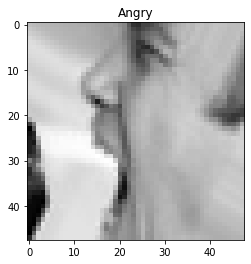

In [ ]:
i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [9]:
# Create the second model
model = Sequential()

model.add(Conv2D(64, (4,4), padding='same', input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (4,4), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (4,4), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="linear"))
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 64)        1088      
                                                                 
 activation_19 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_16 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 48, 48, 64)        65600     
                                                                 
 activation_20 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_17 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                     

In [ ]:
train_path = "drive/MyDrive/archive/train/"
test_path = "drive/MyDrive/archive/test"

#train_path = 'drive/MyDrive/DatAss3/archive/train'
#test_path = 'drive/MyDrive/DatAss3/archive/test'

In [ ]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [ ]:
epochs=50

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=test_generator,
                validation_steps=num_test_imgs//32)

model.save('model3.h5')

Epoch 1/20
898/898 [==============================] - ETA: 0s - loss: 1.7727 - accuracy: 0.2717 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
#Test the model
my_model = load_model('model3.h5', compile=False)


In [ ]:

#Generate a batch of images
test_img, test_lbl = test_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [ ]:
from sklearn import metrics

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
cap = cv2.VideoCapture('test1.mp4')

In [ ]:
from keras.preprocessing.image import img_to_array

In [ ]:
while True:
    ret,frame=cap.read()
    labels=[]
    
    if(img is not None):
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
      break
    faces=face_cascade.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        #Get image ready for prediction
        roi=roi_gray.astype('float')/255.0  #Scale
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)  #Expand dims to get it ready for prediction (1, 48, 48, 1)

        preds=my_model.predict(roi)[0]  #Yields one hot encoded result for 7 classes
        label=class_labels[preds.argmax()]  #Find the label
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
              

    cv2_imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [ ]:
cap.release()
cv2.destroyAllWindows()